In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [237]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
data = pd.read_csv('../Downloads/Metro_Interstate_Traffic_Volume.csv')

### Modify data

In [239]:
constant = 758
noize = np.array([random.randint(-300, 300) for _ in range(len(data))])

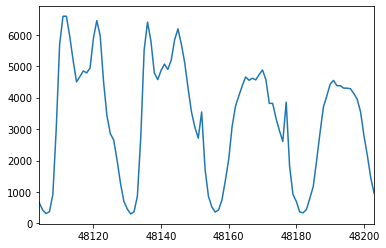

In [240]:
data.traffic_volume[-100:].plot()

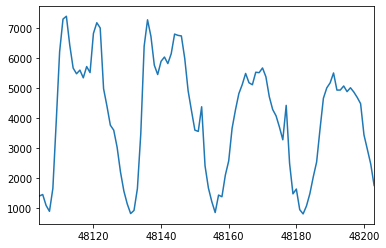

In [241]:
(data.traffic_volume + noize + constant)[-100:].plot()

In [242]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


### Encode categorical features

In [243]:
categorical = set(data.columns) - set(data._get_numeric_data().columns)

In [244]:
for column in categorical:
    if column != 'date_time':
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)

In [246]:
data.index = pd.to_datetime(data.date_time)

In [248]:
data.drop('date_time', axis=1, inplace=True)

In [251]:
data.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,SQUALLS,Sky is Clear,broken clouds,drizzle,few clouds,...,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [256]:
len(data)

48204

In [257]:
train = data[:37000]

In [261]:
public = data[37000:42000]
private = data[37000:]

In [263]:
len(private)

11204

In [264]:
!pwd

/Users/gsinyakov/ts_course


In [265]:
train.to_csv('train.csv')

In [266]:
public.to_csv('public.csv')

In [267]:
private.to_csv('private.csv')

In [268]:
train

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,SQUALLS,Sky is Clear,broken clouds,drizzle,few clouds,...,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-08 10:00:00,286.08,0.0,0.0,5,4526,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-08 11:00:00,288.14,0.0,0.0,1,5021,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-09-08 12:00:00,289.28,0.0,0.0,5,5120,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [272]:
train.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,SQUALLS,Sky is Clear,broken clouds,drizzle,few clouds,...,Independence Day,Labor Day,Martin Luther King Jr Day,Memorial Day,New Years Day,None,State Fair,Thanksgiving Day,Veterans Day,Washingtons Birthday
temp,1.000000,0.009971,-0.022359,-0.126771,0.131032,0.008750,0.159651,-0.025707,0.008268,0.041003,...,0.007406,0.010434,-0.008867,0.005906,-0.015585,0.005180,0.008040,-0.005246,0.000837,-0.009290
rain_1h,0.009971,1.000000,-0.000135,0.005096,0.005348,0.000625,-0.001763,-0.002679,-0.000662,-0.001728,...,-0.000083,0.000045,-0.000072,-0.000083,-0.000093,0.000237,-0.000083,-0.000093,-0.000083,-0.000083
snow_1h,-0.022359,-0.000135,1.000000,0.031615,0.000963,-0.000323,-0.006844,-0.010400,-0.003704,-0.006709,...,-0.000323,-0.000361,-0.000280,-0.000323,-0.000361,0.001108,-0.000323,-0.000361,-0.000323,-0.000323
clouds_all,-0.126771,0.005096,0.031615,1.000000,0.049591,0.006993,-0.282820,0.187212,0.113111,-0.170567,...,-0.013088,0.001293,-0.006465,-0.001910,0.010093,0.000615,-0.006394,0.005364,0.001839,0.004583
traffic_volume,0.131032,0.005348,0.000963,0.049591,1.000000,-0.006219,0.018622,0.048411,-0.010547,0.035916,...,-0.011300,-0.012962,-0.011888,-0.011181,-0.011220,0.042849,-0.013627,-0.014003,-0.013539,-0.013659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,0.005180,0.000237,0.001108,0.000615,0.042849,0.000371,-0.002986,-0.003198,0.004250,-0.003340,...,-0.291560,-0.325979,-0.252495,-0.291560,-0.325979,1.000000,-0.291560,-0.325979,-0.291560,-0.291560
State Fair,0.008040,-0.000083,-0.000323,-0.006394,-0.013627,-0.000108,-0.002290,-0.003479,-0.001239,0.010360,...,-0.000108,-0.000121,-0.000094,-0.000108,-0.000121,-0.291560,1.000000,-0.000121,-0.000108,-0.000108
Thanksgiving Day,-0.005246,-0.000093,-0.000361,0.005364,-0.014003,-0.000121,-0.002560,0.003838,-0.001385,-0.002509,...,-0.000121,-0.000135,-0.000105,-0.000121,-0.000135,-0.325979,-0.000121,1.000000,-0.000121,-0.000121
Veterans Day,0.000837,-0.000083,-0.000323,0.001839,-0.013539,-0.000108,-0.002290,0.013799,-0.001239,-0.002244,...,-0.000108,-0.000121,-0.000094,-0.000108,-0.000121,-0.291560,-0.000108,-0.000121,1.000000,-0.000108


In [276]:
import seaborn as sns

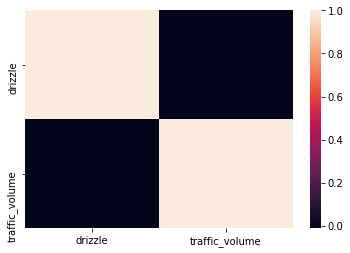

In [285]:
sns.heatmap(train[['drizzle', 'traffic_volume']].corr())

In [384]:
ts = data.traffic_volume

In [290]:
plotting.plot_ts(ts['2016':])

In [291]:
ts = ts['2016':]

In [332]:
from tools import prepare_ts

In [333]:
ts = prepare_ts(ts)

In [334]:
ts_train = ts[:17000]

In [335]:
ts_test = ts[17000:]

In [421]:
from model import TimeSeriesPredictor

In [422]:
predictor = TimeSeriesPredictor(num_lags=96, granularity='hour')

In [423]:
predictor.fit(ts_train)

In [372]:
ts_pred = predictor.predict_next(ts_train, k=len(ts_test))

In [373]:
plotting.plot_multiple_ts(ts_test, ts_pred)

In [424]:
mase(ts_pred, ts_test)

ValueError: Found input variables with inconsistent numbers of samples: [7000, 6084]

In [375]:
len(ts_test)

6084

In [376]:
len(ts_pred)

6084

In [377]:
len(np.where(ts_pred.index.duplicated())[0])

0

In [378]:
ts_pred

2018-01-19 18:00:00    4525.611189
2018-01-19 19:00:00    3511.447292
2018-01-19 20:00:00    3092.603037
2018-01-19 21:00:00    2972.221206
2018-01-19 22:00:00    2707.511597
                          ...     
2018-09-30 01:00:00     616.496112
2018-09-30 02:00:00     364.456324
2018-09-30 03:00:00     284.818933
2018-09-30 04:00:00     334.475558
2018-09-30 05:00:00     915.731455
Length: 6084, dtype: float64

In [379]:
ts_test

date_time
2018-01-19 18:00:00    4503
2018-01-19 19:00:00    3516
2018-01-19 20:00:00    3094
2018-01-19 21:00:00    3370
2018-01-19 22:00:00    2819
                       ... 
2018-09-30 19:00:00    3543
2018-09-30 20:00:00    2781
2018-09-30 21:00:00    2159
2018-09-30 22:00:00    1450
2018-09-30 23:00:00     954
Name: traffic_volume, Length: 6084, dtype: int64

In [380]:
from sklearn.metrics import r2_score, mean_absolute_error

In [381]:
r2_score(ts_test, ts_pred)

-1.0471295963768714

In [382]:
mean_absolute_error(ts_test, ts_pred)

2349.1665819913583

In [406]:
ts = data.traffic_volume

In [407]:
ts = prepare_ts(ts)

In [408]:
len(ts)

40575

In [409]:
ts_train, ts_valid = ts[:33000], ts[33000:]

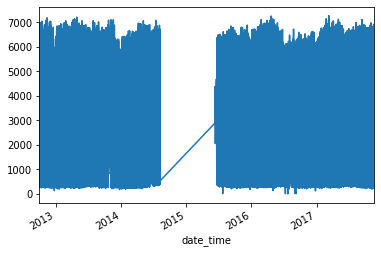

In [410]:
ts_train.plot()

In [411]:
len(ts_train)

33000

In [425]:
len(ts_valid)

7575

In [412]:
ts_train, ts_test = ts_train[:26000], ts_train[26000:]

In [414]:
ts_train.to_csv('ts_train.csv')

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [415]:
ts_test.to_csv('ts_test.csv')

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.



In [426]:
ts_valid.index.to_csv('ts_valid.csv')

AttributeError: 'DatetimeIndex' object has no attribute 'to_csv'

In [417]:
import random
sample = pd.Series(index=ts_valid.index, data=[random.randint(0, 5000) for _ in range(len(ts_valid))])

In [419]:
all(sample.index == ts_valid.index)

True

In [420]:
sample.to_csv('sample.csv')

/Users/gsinyakov/ts_course/.env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.

